In [10]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs 

In [11]:
# 加えてやりたいこと
# dwntwn実行後はovlpが128から134に増加した
# ovlpでNoMASKになる都市とそうでない都市を判別する
# NoMASKはlndmsk問題によって発生している→修正(307)都市
# MASKは作って，CAMA推定は行わないようにするのが良いと思われる

In [12]:
def geography(one, twho, three, four):
    #
    a = 2160
    b = 4320
    gl5shape = (a, b)
    #
    upperindex = (90-four)*12
    lowerindex = (90-three)*12
    leftindex = (180+one)*12
    rightindex = (180+two)*12
    #
    rgnshape = (lowerindex-upperindex, rightindex-leftindex)
    #
    img_extent = (one, two, three, four)  
    
    return upperindex, lowerindex, leftindex, rightindex, rgnshape, img_extent

In [13]:
### to be changed ###
root_dir = '/mnt/c/Users/tsimk/Downloads/dotfiles/h08'

#name of the camacity file
cmct_name = '/mnt/c/Users/tsimk/Downloads/dotfiles/h08/camacity/dat/cty_lst_/create_text/camacity_first.txt'

#patt for the reference file
ref_path = '/mnt/c/Users/tsimk/Downloads/dotfiles/h08/global_city/dat/vld_cty_/city_clrd0000.gl5'


In [16]:
# vld_cty_にはNoMASKのcity_maskが存在しない
# 除去するprocessを加える必要がある

vlddir = f'/mnt/c/Users/tsimk/Downloads/dotfiles/h08/global_city/dat/vld_cty_'
moddir = f'/mnt/c/Users/tsimk/Downloads/dotfiles/h08/camacity/dat/dwn_msk_'
lowdir = f'/mnt/c/Users/tsimk/Downloads/dotfiles/h08/camacity/dat/low_msk_'

ovlp_list = []
canvas = np.zeros((2160, 4320))

for cty_ind in range(1, 1861):
    
    vld_path = f'{vlddir}/city_{cty_ind:08}.gl5'
    dwn_path = f'{moddir}/city_kj_{cty_ind:08}.gl5'
    if not os.path.exists(vld_path):
        
        low_path = f'{lowdir}/city_kj_{cty_ind:08}.gl5'
        if not os.path.exists(low_path):
            print(f"{cty_ind} is NoMASK")
            continue
        else:
            msk_path =  low_path
            
    elif os.path.exists(dwn_path):
        msk_path = dwn_path

    else:
        msk_path = vld_path

    ###################################################################
    # JOB
    ###################################################################
    # maskの値を取得
    mask = np.fromfile(msk_path, dtype='float32').reshape(2160, 4320)
        
    # maskが0でない場所のインデックスを取得(tuple形式)
    non_zero_coords = np.where(mask != 0)
    
    # キャンバスのmask位置に存在する値を取得
    settled_values = canvas[non_zero_coords]
    
    # ユニークな値は?
    unq = np.unique(settled_values)
    unq_non_zero = unq[unq > 0]

    if np.sum(settled_values) > 0:
        ovlp_list.append(cty_ind)
        print(f'cty_ind:{cty_ind} is overlapped with cty_ind:{unq_non_zero}')

        """
        for j in range(len(mask)):
            for k in range(len(mask[0])):
                if mask[j,k] != 0:
                    if canvas[j,k] != 0:
                        mask[j,k] = 0
        non_zero_update = np.where(mask != 0)
        canvas[non_zero_update] = cty_ind
        if np.sum(mask) == 0:
            print(f'cty_ind: {cty_ind} is NoMASK')
        """
    else:
        # update canvas
        canvas[non_zero_coords] = cty_ind

print(ovlp_list)

cty_ind:43 is overlapped with cty_ind:[24.]
cty_ind:44 is overlapped with cty_ind:[23.]
cty_ind:122 is overlapped with cty_ind:[77.]
cty_ind:148 is overlapped with cty_ind:[23.]
cty_ind:152 is overlapped with cty_ind:[84.]
cty_ind:158 is overlapped with cty_ind:[26.]
cty_ind:160 is overlapped with cty_ind:[144.]
168 is NoMASK
cty_ind:174 is overlapped with cty_ind:[27.]
cty_ind:206 is overlapped with cty_ind:[84.]
cty_ind:225 is overlapped with cty_ind:[27.]
cty_ind:227 is overlapped with cty_ind:[207.]
cty_ind:236 is overlapped with cty_ind:[128.]
cty_ind:237 is overlapped with cty_ind:[27.]
cty_ind:252 is overlapped with cty_ind:[52.]
cty_ind:257 is overlapped with cty_ind:[5.]
cty_ind:268 is overlapped with cty_ind:[207.]
cty_ind:278 is overlapped with cty_ind:[28.]
cty_ind:283 is overlapped with cty_ind:[37.]
285 is NoMASK
323 is NoMASK
cty_ind:356 is overlapped with cty_ind:[97.]
393 is NoMASK
409 is NoMASK
cty_ind:412 is overlapped with cty_ind:[36.]
422 is NoMASK
cty_ind:423 is 

In [ ]:
#removal of overlapped grids

camadir = f'/mnt/c/Users/tsimk/Downloads/dotfiles/h08/camacity/dat/ovlpmsk_'

for i in ovlp_list:
    print(f'overlap num {i} doing ---')
    
    #removing grids
    vld_path = f'{vlddir}/city_{i:08}.gl5'
    dwn_path = f'{moddir}/city_kj_{i:08}.gl5'
    if not os.path.exists(vld_path):
        msk_path = f'{lowdir}/city_kj_{i:08}.gl5'
    elif os.path.exists(dwn_path):
        msk_path = dwn_path
    else:
        msk_path = vld_path
        
    mask = np.fromfile(msk_path, dtype='float32').reshape(2160, 4320)
    for j in range(len(mask)):
        for k in range(len(mask[0])):
            if mask[j,k] == 1:
                if canvas[j,k] != 0:
                    mask[j,k] = 0
    
    #saving
    save_path = f'{root_dir}/camacity/dat/ovlpmsk_/city_kj_{i:08}.gl5'
    mask.astype(np.float32).tofile(save_path)
    print(f"{save_path} saved")

overlap num 43 doing ---
/mnt/c/Users/tsimk/Downloads/dotfiles/h08/camacity/dat/ovlpmsk_/city_kj_00000043.gl5 saved
overlap num 44 doing ---
/mnt/c/Users/tsimk/Downloads/dotfiles/h08/camacity/dat/ovlpmsk_/city_kj_00000044.gl5 saved
overlap num 122 doing ---
/mnt/c/Users/tsimk/Downloads/dotfiles/h08/camacity/dat/ovlpmsk_/city_kj_00000122.gl5 saved
overlap num 148 doing ---
/mnt/c/Users/tsimk/Downloads/dotfiles/h08/camacity/dat/ovlpmsk_/city_kj_00000148.gl5 saved
overlap num 152 doing ---
/mnt/c/Users/tsimk/Downloads/dotfiles/h08/camacity/dat/ovlpmsk_/city_kj_00000152.gl5 saved
overlap num 158 doing ---
/mnt/c/Users/tsimk/Downloads/dotfiles/h08/camacity/dat/ovlpmsk_/city_kj_00000158.gl5 saved
overlap num 160 doing ---
/mnt/c/Users/tsimk/Downloads/dotfiles/h08/camacity/dat/ovlpmsk_/city_kj_00000160.gl5 saved
overlap num 174 doing ---
/mnt/c/Users/tsimk/Downloads/dotfiles/h08/camacity/dat/ovlpmsk_/city_kj_00000174.gl5 saved
overlap num 206 doing ---
/mnt/c/Users/tsimk/Downloads/dotfiles/h0

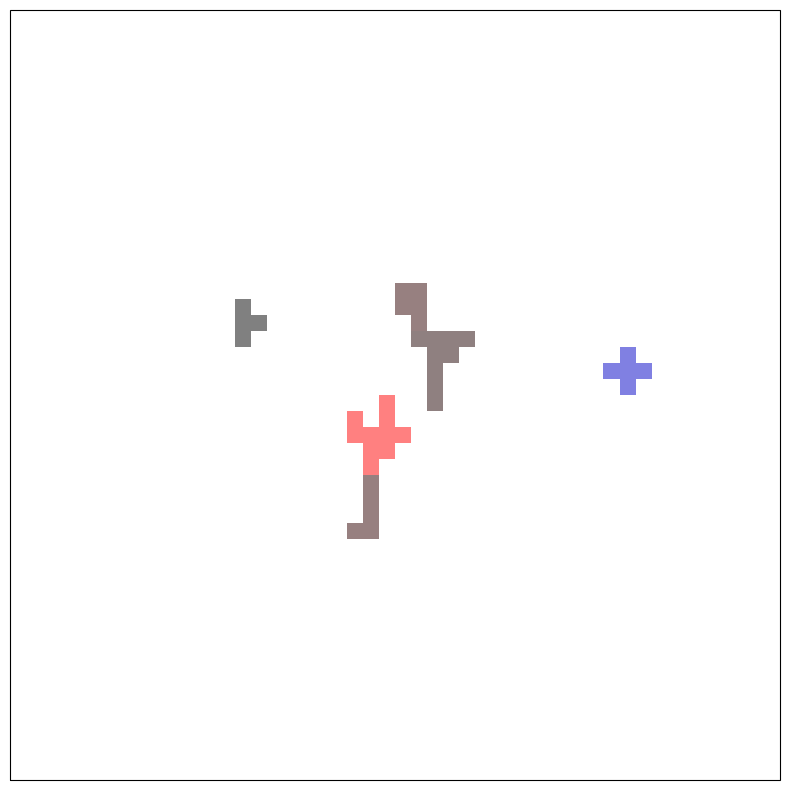

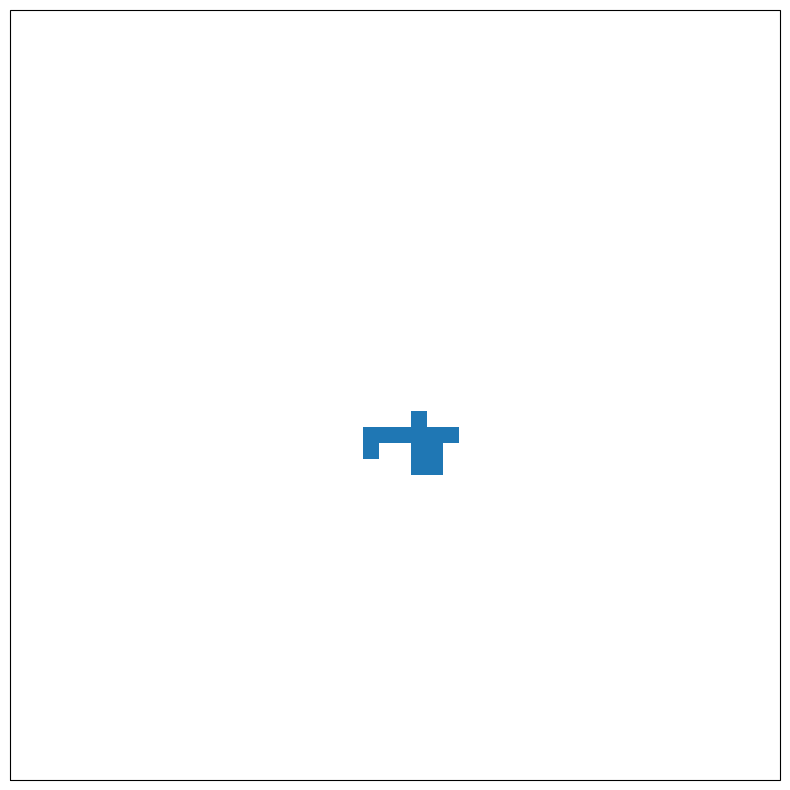

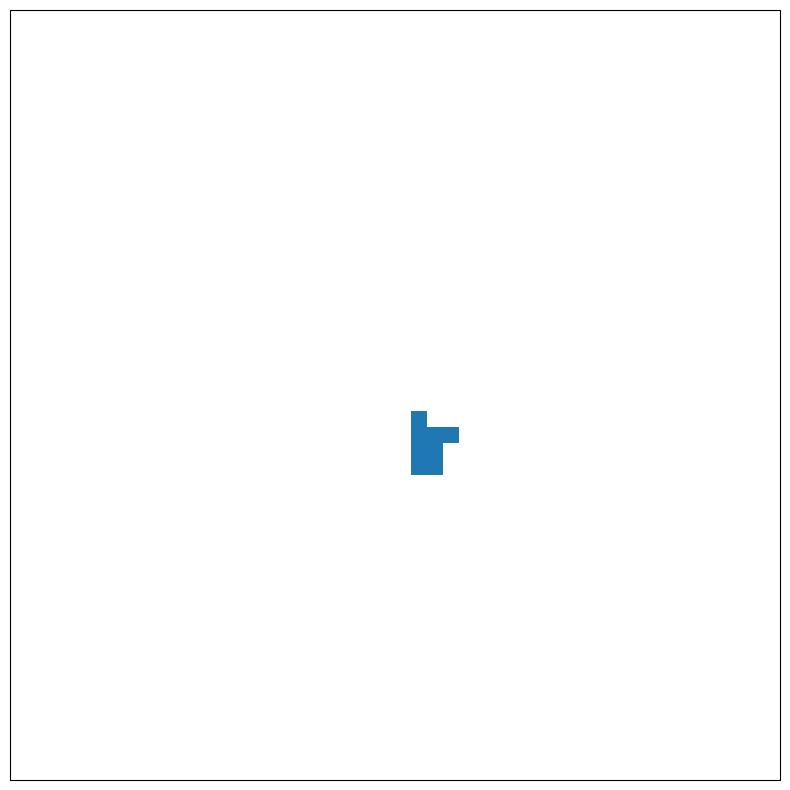

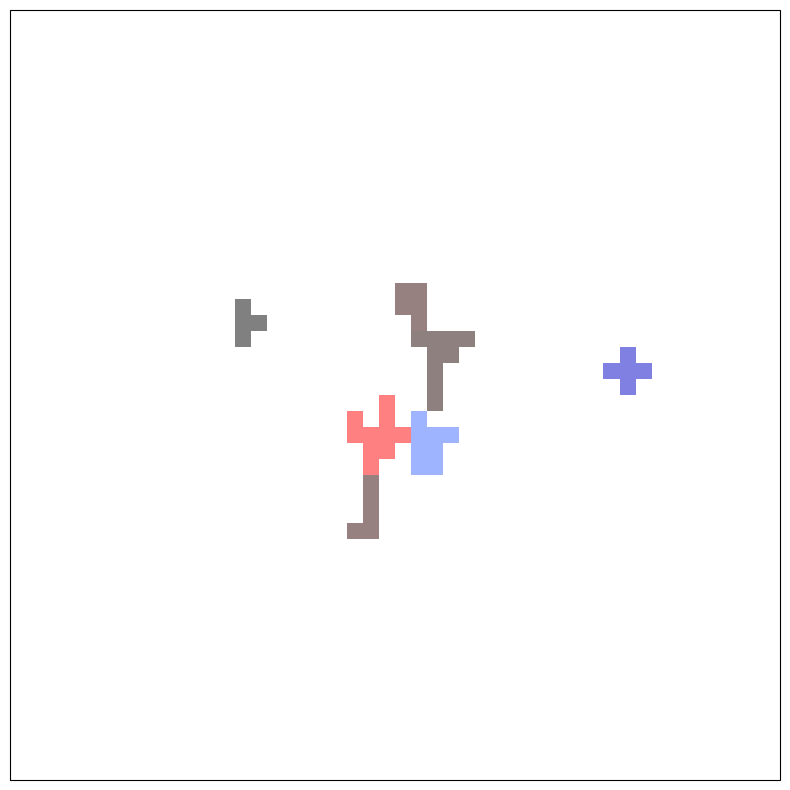

In [53]:
#drawings
city_nb = 122 #Dongguan
one = 26
two = 30
three = -28
four = -24

upperindex, lowerindex, leftindex, rightindex, rgnshape, img_extent = geography(one, two, three, four)

#ref
ref_path = '/mnt/c/Users/tsimk/Downloads/dotfiles/h08/global_city/dat/vld_cty_/city_clrd0000.gl5'
ref = np.fromfile(ref_path, dtype='float32').reshape(2160, 4320)

ref_cropped = ref[upperindex:lowerindex, leftindex:rightindex]
ref_masked = np.ma.masked_where(ref_cropped==0, ref_cropped)

projection = ccrs.PlateCarree()
fig = plt.figure(figsize=(10, 10))
ax = plt.subplot(projection=projection)
im = ax.imshow(ref_masked,
               extent=img_extent, transform=projection, cmap='flag', alpha=0.5)
ax.coastlines()
plt.show()

#before removal

ctyclr_path = f'/mnt/c/Users/tsimk/Downloads/dotfiles/h08/global_city/dat/vld_cty_/city_{city_nb:08}.gl5'
ctyclr_gl5 = np.fromfile(ctyclr_path, dtype='float32').reshape(2160, 4320)
ctyclr_cropped = ctyclr_gl5[upperindex:lowerindex, leftindex:rightindex]
ctyclr_masked = np.ma.masked_where(ctyclr_cropped==0, ctyclr_cropped)

projection = ccrs.PlateCarree()
fig = plt.figure(figsize=(10, 10))
ax = plt.subplot(projection=projection)
im = ax.imshow(ctyclr_masked,
               extent=img_extent, transform=projection, cmap='tab20')
ax.coastlines()
plt.show()

#after removal

ctyclr_path = f'/mnt/c/Users/tsimk/Downloads/dotfiles/h08/camacity/dat/cty_msk_/city_et_{city_nb:08}.gl5'
ctyclr_gl5 = np.fromfile(ctyclr_path, dtype='float32').reshape(2160, 4320)
ctyclr_cropped = ctyclr_gl5[upperindex:lowerindex, leftindex:rightindex]
ctyclr_masked = np.ma.masked_where(ctyclr_cropped==0, ctyclr_cropped)

projection = ccrs.PlateCarree()
fig = plt.figure(figsize=(10, 10))
ax = plt.subplot(projection=projection)
im = ax.imshow(ctyclr_masked,
               extent=img_extent, transform=projection, cmap='tab20')
ax.coastlines()
plt.show()

mod = ref + ctyclr_gl5*city_nb
mod_cropped = mod[upperindex:lowerindex, leftindex:rightindex]
mod_masked = np.ma.masked_where(mod_cropped==0, mod_cropped)

projection = ccrs.PlateCarree()
fig = plt.figure(figsize=(10, 10))
ax = plt.subplot(projection=projection)
im = ax.imshow(mod_masked,
               extent=img_extent, transform=projection, cmap='flag', alpha=0.5)
ax.coastlines()
plt.show()

In [ ]:
vlddir = f'/mnt/c/Users/tsimk/Downloads/dotfiles/h08/global_city/dat/vld_cty_'
moddir = f'/mnt/c/Users/tsimk/Downloads/dotfiles/h08/camacity/dat/dwn_msk_'
lowdir = f'/mnt/c/Users/tsimk/Downloads/dotfiles/h08/camacity/dat/low_msk_'
savedir = f'/mnt/c/Users/tsimk/Downloads/dotfiles/h08/camacity/dat/cty_msk_'
save_path = f'{savedir}/city_clrd0000.gl5'

canvas = np.zeros((2160, 4320))

for cty_ind in range(1, 1861):
    
    vld_path = f'{vlddir}/city_{cty_ind:08}.gl5'
    dwn_path = f'{moddir}/city_kj_{cty_ind:08}.gl5'
    if not os.path.exists(vld_path):
        
        low_path = f'{lowdir}/city_kj_{cty_ind:08}.gl5'
        if not os.path.exists(low_path):
            print(f"{cty_ind} is NoMASK")
            continue
        else:
            msk_path =  low_path
            
    elif os.path.exists(dwn_path):
        msk_path = dwn_path

    else:
        msk_path = vld_path

    ###################################################################
    # JOB
    ###################################################################
    # maskの値を取得
    mask = np.fromfile(msk_path, dtype='float32').reshape(2160, 4320)
        
    # maskが0でない場所のインデックスを取得(tuple形式)
    non_zero_coords = np.where(mask != 0)
    
    # キャンバスのmask位置に存在する値を取得
    settled_values = canvas[non_zero_coords]
    
    # ユニークな値は?
    unq = np.unique(settled_values)
    unq_non_zero = unq[unq > 0]

    # overlap判定
    if np.sum(settled_values) > 0:
        # 重複削除
        for j in range(len(mask)):
            for k in range(len(mask[0])):
                if mask[j,k] != 0:
                    if canvas[j,k] != 0:
                        mask[j,k] = 0
        non_zero_update = np.where(mask != 0)
        canvas[non_zero_update] = cty_ind
        if np.sum(mask) == 0:
            print(f'cty_ind: {cty_ind} is overlap and NoMASK')
    else:
        # update canvas
        canvas[non_zero_coords] = cty_ind

canvas.astype(np.float32).tofile(save_path)